# Tutorial #6

1. Write a function `my_bisection(f,a,b,tol)` that returns `[R,E]`, where `f` is a function object, `a` and `b` are scalars such that `a < b`, and `tol` is a strictly positive scalar value. The function should return an array, `R`, where `R[i]` is the estimation of the root of $f$ defined by $(a + b)/2$ for the $i$th iteration of the bisection method. Remember to include the initial estimate. The function should also return an array, `E`, where `E[i]` is the value of $|f(R[i])|$ for the $i$th iteration of the bisection method. The function should terminate when `E(i) < tol`. Assume that $\mathrm{sign}(f(a)) \neq \mathrm{sign}(f(b))$.
Clarification: The input `a` and `b` constitute the first iteration of bisection; therefore, `R` and `E` should never be empty.

Test cases:
```
    In: f = lambda x: x**2 - 2
        [R, E] = my_bisection(f, 0, 2, 1e-1)
    Out: R = [1, 1.5, 1.25, 1.375, 1.4375]
         E = [1, 0.25, 0.4375, 0.109375, 0.06640625]
    
    In: f = lambda x: np.sin(x) - np.cos(x)
        [R, E] = my_bisection(f, 0, 2, 1e-2)
    Out: R = [1, 0.5, 0.75, 0.875, 0.8125, 0.78125]
         E = [0.30116867893975674, 0.39815702328616975, 0.05005010885048666, 0.12654664407270177, 0.038323093040207645,  
             0.005866372111545948] 
```

In [1]:
def my_bisection(f, a, b, tol):
    # first element of R and E
    R = [(a + b) / 2]  # to estimate the root
    E = [abs(f(R[0]))]  # error
    
    while E[-1] >= tol:
        c = (a + b)/2
        
        if f(a)*f(c) > 0:
            a = c
        else:
            b = c
        
        R.append((a + b)/2)
        E.append(abs(f(R[-1])))
    
    return [R, E]

In [2]:
# Test case #1
f = lambda x: x**2 - 2
[R, E] = my_bisection(f, 0, 2, 1e-1)
print("R =", R,"\nE =", E)

R = [1.0, 1.5, 1.25, 1.375, 1.4375] 
E = [1.0, 0.25, 0.4375, 0.109375, 0.06640625]


In [3]:
# Test case #2
import numpy as np

f = lambda x: np.sin(x) - np.cos(x)
[R, E] = my_bisection(f, 0, 2, 1e-2)
print("R =", R,"\nE =", E)

R = [1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125] 
E = [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.12654664407270189, 0.038323093040207756, 0.005866372111545948]


2. Write a function `my_newton(f,df,x0,tol)` that returns `[R,E]`, where `f` is a function object, `df` is a function object giving the derivative of `f`, `x0` is an initial estimation of the root, and `tol` is a strictly positive scalar. The function should return an array, `R`, where `R[i]` is the Newton–Raphson estimate of the root of `f` for the $i$th iteration. Remember to include the initial estimate. The function should also return an array, `E`, where `E[i]` is the value of $|f(R[i])|$ for the $i$th iteration of the Newton-Raphson method. The function should terminate when `E(i) < tol`. Assume that the derivative of `f` will not hit zero during any iteration for any of the test cases given.

Test cases:
```
    In: f = lambda x: x**2 - 2
        df = lambda x: 2*x
        [R, E] = my_newton(f, df, 1, 1e-5)
    Out: R = [1, 1.5, 1.4166666666666667, 1.4142156862745099]
         E = [1, 0.25, 0.006944444444444642, 6.007304882871267e-06]
    
    In: f = lambda x: np.sin(x) - np.cos(x)
        df = lambda x: np.cos(x) + np.sin(x)
        [R, E] = my_newton(f, df, 1, 1e-5)
    Out: R = [1, 0.782041901539138, 0.7853981759997019]
         E = [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08]
```

In [4]:
def my_newton(f,df,x0,tol):
    # first element of R and E
    R = [x0]  # to estimate the root
    E = [abs(f(x0))]  # error
    
    while E[-1] >= tol:
        x = R[-1]
        x = x - f(x)/df(x)
        
        R.append(x)
        E.append(abs(f(x)))
    
    return [R, E]

In [5]:
# Test case #1
f = lambda x: x**2 - 2
df = lambda x: 2*x
[R, E] = my_newton(f, df, 1, 1e-5)
print("R =", R,"\nE =", E)

R = [1, 1.5, 1.4166666666666667, 1.4142156862745099] 
E = [1, 0.25, 0.006944444444444642, 6.007304882871267e-06]


In [6]:
# Test case #2
f = lambda x: np.sin(x) - np.cos(x)
df = lambda x: np.cos(x) + np.sin(x)
[R, E] = my_newton(f, df, 1, 1e-5)
print("R =", R,"\nE =", E)

R = [1, 0.782041901539138, 0.7853981759997019] 
E = [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08]


3. Consider the problem of building a pipeline from an offshore oil platform, a distance $H$ miles from the shoreline, to an oil refinery station on land, a distance $L$ miles along the shore. The cost of building the pipe is $C_{\text{ocean/mile}}$ while the pipe is under the ocean, and $C_{\text{land/mile}}$ while the pipe is on land. The pipe will be built in a straight line toward the shore where it will make contact at some point, $x$, between $0$ and $L$. It will continue along the shore on land until it reaches the oil refinery.
    
    See the following figure for clarification.
    
    Write a function `my_pipe_builder(C_ocean,C_land,L,H)` where the input arguments are as described earlier, and `x` is the $x$-value that minimizes the total cost of the pipeline. Use the bisection method to determine this value to within a tolerance of $1\times10^{−6}$, starting at an initial bound of $a = 0$ and $b = L$.

Test cases:
```
    In: my_pipe_builder(20, 10, 100, 50)
    Out: 28.867512941360474

    In: my_pipe_builder(30, 10, 100, 50)
    Out: 17.677670717239380
    
    In: my_pipe_builder(30, 10, 100, 20)
    Out: 7.071067392826080
```

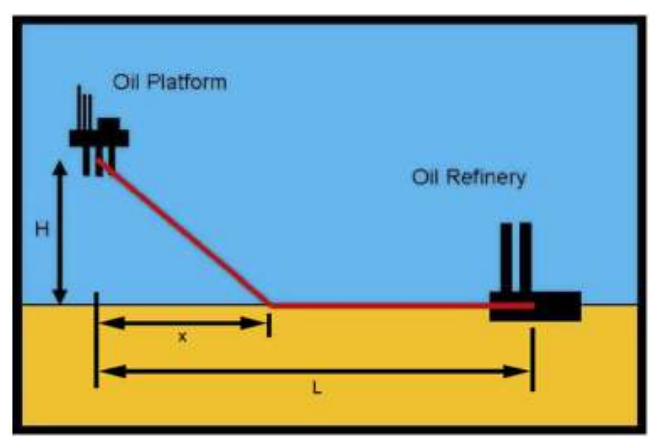

In [7]:
def my_pipe_builder(C_ocean, C_land, L, H):
    
    f = lambda x: C_ocean*x/((x**2 + H**2)**0.5) - C_land
    a = 0
    b = L
    tol = 1e-6
    [R,E] = my_bisection(f, a, b, tol)
    
    return R[-1]

In [8]:
# Test cases #1
my_pipe_builder(20, 10, 100, 50)

28.867512941360474

In [9]:
# Test cases #2
my_pipe_builder(30, 10, 100, 50)

17.67767071723938

In [10]:
# Test cases #3
my_pipe_builder(30, 10, 100, 20)

7.07106739282608